## Distribution of sum of independent random variable

### Discrete Random Variable

Sometimes, we are interested in the **distribution** of the sum of two or more independent, identically distributed random variales (iid). We will start with a simple illustrative example.

<ins>Example 1: sum of 2 dice rolls</ins>

Assume we have 2 fair six-sided dice, labelled 1 through 6. $X_1, X_2 \sim \textbf{Discrete Uniform(6)}$. First, let's say we are interested in figuring out the probability of rolling:
- a 7 or an 11
- 2,3, or 12

For those who are degenerate gamblers, you might recognize these are the rolls of interest in the game of craps.

Hence, we are interested in the:
$$P(X_1 + X_2 = 7 \text{ or } 11)$$
$$P(X_1 + X_2 = 2, 3 \text{ or } 12)$$

Since rolling a 7 is mutually exclusive from rolling an 11. 
$$P(X_1 + X_2 = 7 \text{ or } 11) = P(X_1 + X_2 = 2) + P(X_1 + X_2 = 11)$$

We will now iteratively list and count carefully the number of ways of rolling each sum from 2 to 12, shown in the table below:

Sum | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 
--- | - | - | - | - | - | - | - | - | -- | -- | -- |
Ways| 1 | 2 | 3 | 4 | 5 | 6 | 5 | 4 | 3  | 2  | 1  |

Total possible outcomes for two dice is 6 x 6, since die 1 can take on any number from 1 to 6 with equal probability. Same with die 2. Hence 36 total outcomes.

Therefore the probability of rolling 7 or 11 is $$p = \frac{8}{36}$$ and the probability of rolling 2, 3, or 12 is $$p=\frac{4}{36}$$

What if we wanted to figure out the probability mass density and probability distribution of the sum of two dice, in other words:
$$P(X_1 + X_2 = n) = ?$$
or 
$$P(X_1 + X_2 \leq n) = ?$$

$$P(X_1 + X_2 = n) = \sum_{X_2}P(X_1 = n - X_2 | X_2) P(X_2)$$

Note that n is all natural number from 2 to 12 inclusive and the sum goes through all possible values of $X_2$ from 1 to 6, so we can list out the sum explicitly.

$$P(X_1 + X_2 = n) = P(X_1 = n - 1 | 1)P(1) + P(X_1 = n-2|2)P(2) + \dots + P(X_1=n-6|6)P(6)$$

A few things to note, 
- the condition on die 2 doesn't affect die 1
- the probability of rolling 1 through 6 for die 2 are all $\frac{1}{6}$

Hence, the expression simplifies a bit more:
$$P(X_1 + X_2 = n) = \frac{1}{6}[P(X_1 = n - 1) + P(X_1 = n-2) + \dots + P(X_1=n-6)]$$

If we try to plug in different numbers for $n$, we see that some of these terms are 0 (e.g. n=2, only the first term survives; n=3, only the first 2 terms survive)


Let's try to do this problem slightly differently now, with concepts we learned before about continuous random variable's CDF.

$$P(X_1 + X_2 \leq n) = \sum_{X_2}P(X_1 \leq n - X_2 | X_2)P(X_2)$$

$$P(X_1 + X_2 \leq n) = \frac{1}{6} \left[\frac{\min{(\max{(n-1, 0)}, 6)}}{6} + \frac{\min{(\max{(n-2, 0)}, 6)}}{6} + \dots \frac{\min{(\max{(n-6, 0)}, 6)}}{6}\right]$$


It follows that the CDF of a single die:

$$P(X_1 \leq n) = \frac{\min{(\max{(n, 0)}, 6)}}{6}$$

In [5]:
def cdf_sum_two_dice(n):
    s = 0
    for i in range(1, 7):
        s += 1 / 36 * min(max(n - i, 0), 6)
    return s

In [14]:
roll = [i for i in range(2, 13)]
cdf = [cdf_sum_two_dice(i) for i in range(2, 13)]

In [15]:
import matplotlib.pyplot as plt

<BarContainer object of 11 artists>

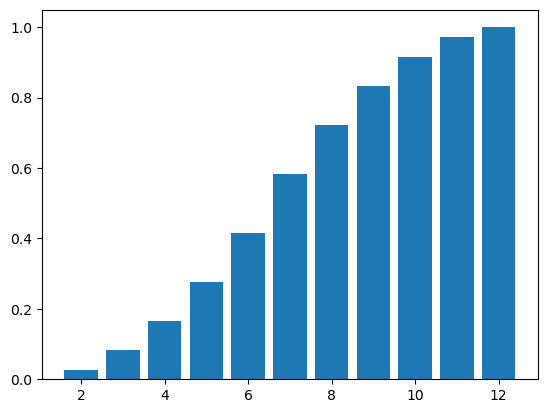

In [16]:
plt.bar(roll, cdf)

### Detour: Probability of min and max of two dice rolls

<ins>Example 2: Probability min of 2 dice</ins>
$$P(\min{(X_1, X_2)} = n)$$
The easiest way to think of a closed-form solution is to imagine n=1, what is the probability that the minimum of two dice is 1? That means one die is 1 and the other die is 1 or greater.
Assume die 1 is 1 and die 2 can be whatever. The probability of this outcome is $$P(X_1 = 1 \text{ and } X_2 = \text{ any }) = \frac{1}{6} \cdot 1$$
Same thing for die 1 being whatever and die 2 being 1. The probability is $$P(X_2 = 1 \text{ and } X_1 = \text{ any }) = \frac{1}{6} \cdot 1$$
Add those and subtract the overcounted case of die 1 = 1 and die 2 = 1, $$P(X_1 = 1, X_2 = 1) = \frac{1}{36}$$
Hence, 
$$P(\min{(X_1, X_2)} = 1) = 2 \cdot \frac{1}{6} - \frac{1}{36}$$

Is there any easier way to visualize this? 

|2 \ 1 | 1 | 2 | 3 | 4 | 5 | 6 |
|------| - | - | - | - | - | - |
|    1 | x | x | x | x | x | x | 
|    2 | x |   |   |   |   |   | 
|    3 | x |   |   |   |   |   |  
|    4 | x |   |   |   |   |   |
|    5 | x |   |   |   |   |   |
|    6 | x |   |   |   |   |   |
    

<ins>Example 3: Probability max of 2 dice</ins>
$$P(\max{(X_1, X_2)} = n)$$

Similarly, to calculate this quantity, we can see if $n=6$, 

|2 \ 1 | 1 | 2 | 3 | 4 | 5 | 6 |
|------| - | - | - | - | - | - |
|    1 |   |   |   |   |   | x |
|    2 |   |   |   |   |   | x |
|    3 |   |   |   |   |   | x |
|    4 |   |   |   |   |   | x |
|    5 |   |   |   |   |   | x |
|    6 | x | x | x | x | x | x |

The result is the same answer as Example 3, $p=\frac{11}{36}$

### Continuous Random Variable

The first step of getting a density is to figure out a distribution of the sum.

$$P(X_1 + X_2 \leq x) = F_{X_1 + X_2}(x)$$
$$f_{X_1+X_2}(x) = \frac{dF_{X_1 + X_2}(x)}{dx}$$

<ins>Example 4: Uniform Distribution</ins>

Let's investigate a simple problem, assume $X_1, X_2 \sim U[0, 1]$, what are the density and distribution of the sum? Clearly, if $X_1, X_1$ has a max of 1 and min of 0, the range of the sum is between 0 and 2.
$$P(X_1 + X_2 \leq x)$$

We are interested in the region in the unit square that is below the line $X_2 \leq x - X_1, x \in [0, 2], X_1 \in [0, 1], X_2 \in [0, 1]$

Therefore, $$P(X_1 + X_2 \leq x) = 1 - \frac{(2 - x)^2}{2}, x \in [0, 2]$$